In [26]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

import seaborn as sns

from src.preprocessing import Preprocessing
from src.visualization import Visualization
from src.experiments import Experiments

In [16]:
train = pd.read_csv('data/train_mad.csv', sep = '\t')

Preprocessing.data_info(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         143 non-null    int64  
 1   distancia          143 non-null    int64  
 2   populacao          143 non-null    int64  
 3   pib                143 non-null    int64  
 4   renda              143 non-null    float64
 5   idhm               143 non-null    float64
 6   urbano             143 non-null    float64
 7   envelhecimento     143 non-null    float64
 8   esp_vida           143 non-null    float64
 9   dependencia        143 non-null    float64
 10  freq_superior      143 non-null    float64
 11  sup_completo       143 non-null    float64
 12  pop15_24           143 non-null    float64
 13  pop25_34           143 non-null    float64
 14  pop35_44           143 non-null    float64
 15  pop45_54           143 non-null    float64
 16  pop55_64           143 non

{'shape': (143, 30),
 'describe':        Unnamed: 0    distancia     populacao           pib        renda  \
 count   143.00000   143.000000  1.430000e+02  1.430000e+02   143.000000   
 mean     71.00000   448.839161  5.988950e+06  3.152888e+08  1235.852168   
 std      41.42463   239.283044  5.165966e+06  3.062804e+08   204.282761   
 min       0.00000    88.000000  4.384540e+05  1.604788e+07   723.320000   
 25%      35.50000   259.500000  1.632562e+06  6.730295e+07  1095.350000   
 50%      71.00000   428.000000  3.080943e+06  1.072350e+08  1230.110000   
 75%     106.50000   578.000000  1.231006e+07  7.012290e+08  1348.860000   
 max     142.00000  1464.000000  1.897093e+07  1.036883e+09  1778.200000   
 
              idhm      urbano  envelhecimento    esp_vida  dependencia  ...  \
 count  143.000000  143.000000      143.000000  143.000000   143.000000  ...   
 mean     0.891469   93.668601        8.059371   76.201958    40.279720  ...   
 std      0.850592    4.256755        1.1

In [17]:
train.fillna(0, inplace = True)
delete_mad = ['Unnamed: 0']
column_target = 'hor_mad'

train.drop(delete_mad, axis=1, inplace=True)

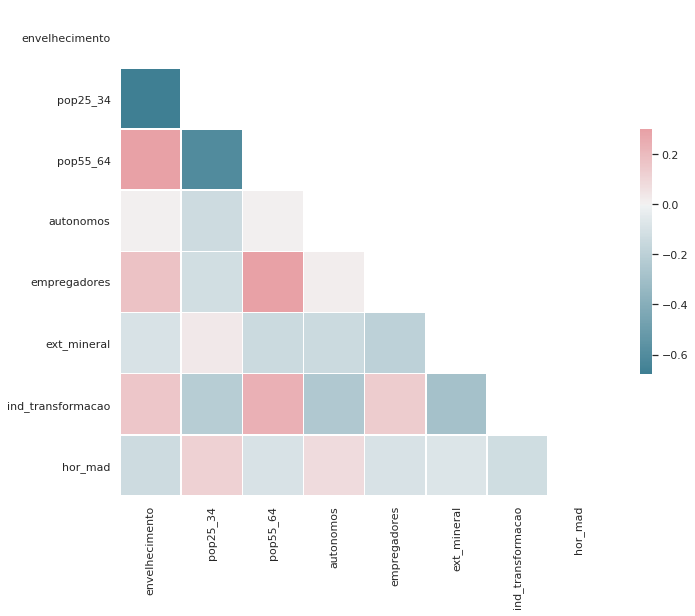

In [18]:
df_train = Preprocessing.select_features(train, column_target)
Visualization.correlation_features(df_train)

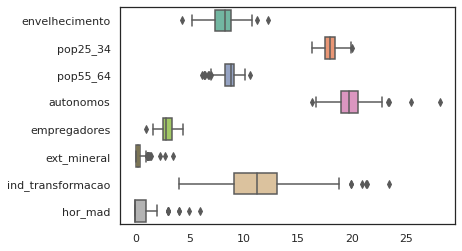

In [19]:
ax = sns.boxplot(data=df_train, orient="h", palette="Set2")

In [32]:
#verificando possiveis erros nos outliers...
for column in df_train.columns.to_list():
    print(f'{column}\n Menor valor: {np.min(df_train[column].to_list())}\n Maior valor: {np.max(df_train[column].to_list())}\n -----------------')
#df_train = Visualization.verify_outliers() -- Analisando os outliers com a descrição de cada feature eles são valores possíveis.

envelhecimento
 Menor valor: 4.35
 Maior valor: 12.26
 -----------------
pop25_34
 Menor valor: 16.29
 Maior valor: 20.02
 -----------------
pop55_64
 Menor valor: 6.14
 Maior valor: 10.62
 -----------------
autonomos
 Menor valor: 16.3
 Maior valor: 28.1
 -----------------
empregadores
 Menor valor: 1.03
 Maior valor: 4.41
 -----------------
ext_mineral
 Menor valor: 0.03
 Maior valor: 3.49
 -----------------
ind_transformacao
 Menor valor: 3.99
 Maior valor: 23.41
 -----------------


In [20]:
target = df_train[column_target]
df_train.drop(column_target, axis = 1, inplace = True)

train = df_train.filter(items=['pop25_34', 'autonomos'])


x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=25)
experiments = Experiments(x_train, y_train, x_test, y_test)

In [21]:
linear_SVR, linear_SVR_measurement  = experiments.models_correlations(LinearSVR())
linear_SVR_measurement

{'model': LinearSVR(),
 'train_time': 0.006785154342651367,
 'test_time': 0.002716541290283203,
 'score': -0.33345613692622944,
 'explained_variance_score': 0.01,
 'max_error': 4.98,
 'mean_absolute_error': 0.81,
 'mean_squared_error': 2.43,
 'r2_score': -0.33}

In [22]:
decision_tree_regressor, decision_tree_regressor_measurement = experiments.models_correlations(DecisionTreeRegressor())
decision_tree_regressor_measurement

{'model': DecisionTreeRegressor(),
 'train_time': 0.014943599700927734,
 'test_time': 0.0011963844299316406,
 'score': -0.7437908496732031,
 'explained_variance_score': -0.74,
 'max_error': 5.0,
 'mean_absolute_error': 1.17,
 'mean_squared_error': 3.17,
 'r2_score': -0.74}

In [23]:
k_neighbors_regressor, k_neighbors_regressor_measurement = experiments.models_correlations(KNeighborsRegressor())
k_neighbors_regressor_measurement

{'model': KNeighborsRegressor(),
 'train_time': 0.005744457244873047,
 'test_time': 0.01083827018737793,
 'score': -0.2502222222222221,
 'explained_variance_score': -0.22,
 'max_error': 4.8,
 'mean_absolute_error': 1.08,
 'mean_squared_error': 2.27,
 'r2_score': -0.25}

In [24]:
random_forest_regressor, random_forest_regressor_measurement = experiments.models_correlations(RandomForestRegressor())
random_forest_regressor_measurement

{'model': RandomForestRegressor(),
 'train_time': 0.1911299228668213,
 'test_time': 0.0071413516998291016,
 'score': -0.0775414379084971,
 'explained_variance_score': -0.04,
 'max_error': 4.84,
 'mean_absolute_error': 0.93,
 'mean_squared_error': 1.96,
 'r2_score': -0.08}

In [25]:
mlp_regressor, mlp_regressor_measurement = experiments.models_correlations(MLPRegressor())
mlp_regressor_measurement

{'model': MLPRegressor(),
 'train_time': 0.04334664344787598,
 'test_time': 0.002553224563598633,
 'score': 0.0142848468211908,
 'explained_variance_score': 0.01,
 'max_error': 4.03,
 'mean_absolute_error': 1.03,
 'mean_squared_error': 1.79,
 'r2_score': 0.01}